# 深度探索监督学习：支持向量机

之前我们已经介绍了监督学习。监督学习中有很多算法，在这里我们深入探索其中一种最强大的也最有趣的算法之一：**支持向量机（Support Vector Machines，SVMs）**.

1.1 最早是由 Vladimir N. Vapnik 和 Alexey Ya. Chervonenkis 在1963年提出 

1.2 目前的版本(soft margin)是由Corinna Cortes 和 Vapnik在1993年提出，并在1995年发表 

1.3 深度学习（2012）出现之前，SVM被认为机器学习中近十几年来最成功，表现最好的算法（在数据样本不够深度学习训练的时候，SVM还是可以选择的算法）


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## 支持向量机

支持向量机（SVMs）是监督学习中用来**分类**或者**回归**的最强大的算法之一。支持向量机是一种判别分类器：它可以在数据的集合中画出一条分割线。

我们可以来看一个简单的支持向量机的做分类的例子。首先我们需要创建一个数据集：

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


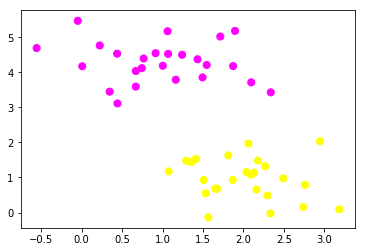

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)  #生成随机数

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');  #c:label，画出来表示的是颜色

一个判别分类器尝试着去在两组数据间画一条分割线。我们首先需要面临一个问题：这条线的位置很难去定。比如，我们可以找出很多可能的线去将两个数据群体完美的划分：

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


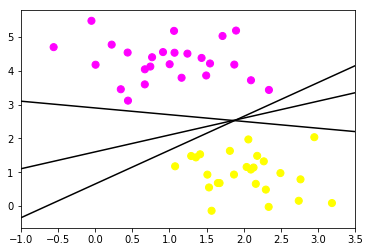

In [3]:
xfit = np.linspace(-1, 3.5)  #生成等差数列，默认50个
print(xfit)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    #绘制分割线
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

上面的图中有三个各异的分割线，它们都可以将数据集合完美地分隔开来。一个新的数据的分类结果会根据你的选择，得出完全不一样的结果。

我们如何去改进这一点呢？

### 支持向量机：最大化*边界*

支持向量机有一种方法去解决这个问题。支持向量机做的事情不仅仅是画一条线，它还考虑了这条分割线两侧的“区域“的选择。关于这个“区域”是个什么，下面是一个例子：

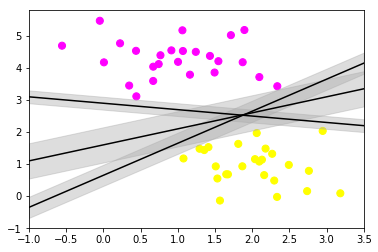

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    #绘制分割线
    plt.plot(xfit, yfit, '-k')
    #绘制分割线两侧的区域
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

注意到，如果我们需要使得直线旁边的区域的宽度达到最大，中间的那条线是最合适的选择。这也就是**支持向量机**的特点和属性，它会优化分隔的直线，使得直线的**边界**与数据集的垂直距离最大。

#### 生成一个支持向量机

现在我们需要根据这些点来生成我们的支持向量机模型。固然生成模型的数学细节很有趣，但是我们想让您在其他地方去了解这些东西。在这里，我们会让您掌握使用scikit-learn的黑盒算法去完成上面的工作。

In [5]:
from sklearn.svm import SVC  # "Support Vector Classifier"  

clf = SVC(kernel='linear') #核函数
clf.fit(X, y)

SVC(kernel='linear')

为了更好的知道发生了什么，我们创造一个简单方便的函数，去画出SVM算法生成的数据集边界：

In [6]:
def plot_svc_decision_function(clf, ax=None):
    """绘制一个 2D SVC 的决策函数"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # 绘制边界
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

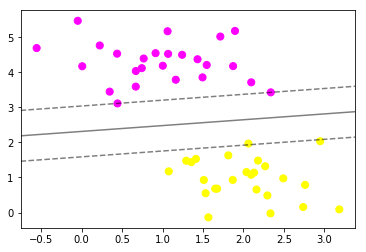

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

注意到图中的虚线碰到了一些点：这些点在这次模型的生成中非常重要，它们也就是所谓的*支持向量*。
在scikit-learn中，这些支持向量被存储在分类器的``suppport_vectors_``属性中：

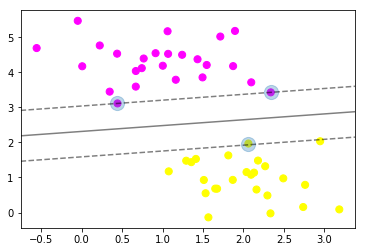

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, alpha=0.3);

#### 进一步探索：核方法

当SVM与*核（kernels）*联系起来的时候，它会变得非常有趣。为了进一步的解释“核”是什么，我们去看一些无法被线性分隔的数据。

In [ ]:
make_circles?

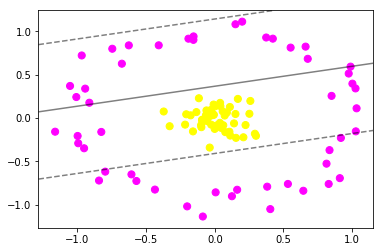

In [9]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1) #随机生成一些点，圆形的,X含2个特征

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

很显然，线性的分隔是不能把这些数据隔开的。我们可以通过应用**核方法**去改变，核方法是一些可以转换输入数据的方法。

比如，我们可以使用一个简单的**径向基函数**

In [11]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))  #增加一个新的特征 r， 两维数据变为3维,

#e的幂次方，e是一个常数为2.71828

如果我们连同数据一起去绘图，我们可以看见它的效果：

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

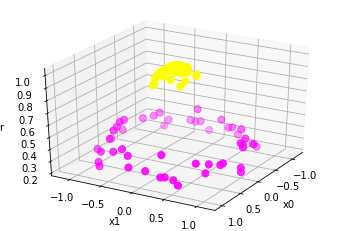

In [12]:
from mpl_toolkits import mplot3d
from ipywidgets import interact

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x0')
    ax.set_ylabel('x1') 
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));
plot_3D()

我们可以看到，这个增加的维度让我们的数据变得线性可分起来！这是一个相对简单的核方法；SVM有很多更成熟更复杂的集成的方法可供使用。这个方法可以通过使用``kernel='rbf'``来实现，其中rbf是*radial basis function*的缩写：

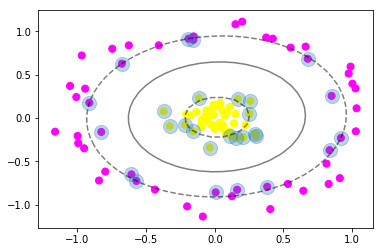

In [13]:
clf = SVC(kernel='rbf',gamma='auto')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, alpha=0.3);

这儿有$N$个有效的基函数：对每一个有灰色阴影圆圈的点。通过"Kernal Trick"这个巧妙的数学技巧，计算显得非常有效率，这种计算方法不用真正的建造核函数度量方法的矩阵。



In [14]:
from sklearn.svm import SVC 
SVC?

**SVM核函数如何选择**

* kernel : string, optional (default='rbf')

    Specifies the kernel type to be used in the algorithm.
    
    It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
    a callable.
    
    If none is given, 'rbf' will be used. If a callable is given it is
    used to pre-compute the kernel matrix from data matrices; that matrix
    should be an array of shape ``(n_samples, n_samples)``

**一般来说先用RBF kernel**

* 简单说一下就是：RBF kernel可以处理非线性的情况，linear kernel可以是RBF kernel的特殊情况，sigmoid kernel又在某些参数下和RBF很像
* polynomial kernel的参数比RBF多，而参数越多模型越复杂
* RBF kernel更方便计算，取值在[0,1]；而用polynomial kernel取值范围是(0,inf)，在自由度高的情况下更凸显出劣势；至于sigmoid，它可能在某些参数下是无效的。当然有些情况下用linear kernel就好了，比如特征维数很高的时候。



## 疾病识别案例

In [15]:
#疾病预测 

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline

# 加载数据
data = pd.read_csv('data/diabetes.csv')

# 含有特征的数据集
X = data.iloc[:,0:8]
# 标记数据
y = data.iloc[:,8]


from sklearn.model_selection import train_test_split


# 将数据集划分为训练集和测试集，其中测试数据为20%
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3)  

from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train,Y_train)
train_score = svc.score(X_train,Y_train)
test_score = svc.score(X_test,Y_test)
print('train score: {} ; test score: {}'.format(train_score, test_score))

train score: 0.7635009310986964 ; test score: 0.7835497835497836


In [16]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
from sklearn import metrics

# 构造一个便于交叉验证模型性能的函数（模块）
def evaluate_cross_validation(clf, X, y, K):
    # KFold(n_splits='warn', shuffle=False, random_state=None)
    cv = KFold(n_splits=K, shuffle=True, random_state = 0)
    # 采用上述的分隔方式进行交叉验证，测试模型性能，对于分类问题，这些得分默认是accuracy，也可以修改为别的
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print('Mean score: %.3f (+/-%.3f)' % (scores.mean(), sem(scores)))
    
# 使用线性核的SVC 
svc_linear = SVC(C=1,kernel='linear')
# 五折交叉验证 K = 5
evaluate_cross_validation(svc_linear, X_train, Y_train, 5)  #训练集上交叉验证
 
svc_linear.fit(X_train, Y_train)    
y_predict = svc_linear.predict(X_test)
print(metrics.classification_report(y_predict, Y_test))

[0.76851852 0.75925926 0.68224299 0.71028037 0.79439252]
Mean score: 0.743 (+/-0.020)
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       165
           1       0.61      0.73      0.66        66

    accuracy                           0.79       231
   macro avg       0.74      0.77      0.75       231
weighted avg       0.80      0.79      0.79       231



In [19]:
# 使用rbf核函数
svc_rbf = SVC(kernel='rbf',C=10)  
# 五折交叉验证 K = 5 
evaluate_cross_validation(svc_rbf, X_train, Y_train, 5)



[0.77777778 0.74074074 0.6635514  0.68224299 0.79439252]
Mean score: 0.732 (+/-0.026)


In [ ]:
SVC?